In [80]:
#Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [84]:
import pandas as pd
df=pd.read_csv('/Users/ahmadkhalilghamai/Downloads/updated_last5_stats.csv')
df

,team,opponent,location,goals_for,goals_against,result,team_rating,opponent_rating,rating_diff,team_points,...,discipline_gap,attack_efficiency,is_win,last_5_wins,is_draw,is_loss,last_5_draws,last_5_losses,last_5_total,last_5_win_rate
0,1. FC Köln,VfB Stuttgart,1,0,2,-1,NaN,7.16,NaN,27,...,NaN,NaN,0,0.0,0,1,0.0,1.0,1.0,0.000000
1,1. FC Köln,Bayer Leverkusen,0,0,3,-1,NaN,7.46,NaN,27,...,NaN,NaN,0,0.0,0,1,0.0,2.0,2.0,0.000000
2,1. FC Köln,Borussia Mönchengladbach,1,3,1,1,NaN,6.81,NaN,27,...,NaN,NaN,1,1.0,0,0,0.0,2.0,3.0,0.333333
3,1. FC Köln,RB Leipzig,0,0,6,-1,NaN,7.08,NaN,27,...,NaN,NaN,0,1.0,0,1,0.0,3.0,4.0,0.250000
4,1. FC Köln,Augsburg,1,1,1,0,NaN,NaN,NaN,27,...,NaN,NaN,0,1.0,1,0,1.0,3.0,5.0,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Wolfsburg,Bochum,1,1,0,1,6.73,NaN,NaN,37,...,NaN,0.272727,1,2.0,0,0,0.0,3.0,5.0,0.400000
518,Wolfsburg,Freiburg,0,2,1,1,6.73,NaN,NaN,37,...,NaN,0.272727,1,3.0,0,0,0.0,2.0,5.0,0.600000
519,Wolfsburg,Darmstadt,1,3,0,1,6.73,NaN,NaN,37,...,NaN,0.272727,1,3.0,0,0,0.0,2.0,5.0,0.600000
520,Wolfsburg,Bayern München,0,0,2,-1,6.73,7.22,-0.49,37,...,-1.0,0.272727,0,3.0,0,1,0.0,2.0,5.0,0.600000


In [9]:
df['goals_difference'] = df['goals_for'] - df['goals_against']

### EDA Analysis

In [11]:
df.columns

Index(['team', 'opponent', 'location', 'goals_for', 'goals_against', 'result',
       'team_rating', 'opponent_rating', 'rating_diff', 'team_points',
       'opponent_points', 'points_diff', 'round', 'started', 'finished',
       'cancelled', 'goals_conceded_per_match', 'goals_conceded_per_match_opp',
       'interceptions_per_match', 'interceptions_per_match_opp',
       'shots_on_target_per_match', 'shots_on_target_per_match_opp',
       'penalties_conceded', 'penalties_conceded_opp', 'penalties_won',
       'penalties_won_opp', 'goals_per_match', 'goals_per_match_opp',
       'table_rank', 'table_rank_opp', 'defensive_pressure_ratio',
       'discipline_gap', 'attack_efficiency', 'is_win', 'last_5_wins',
       'is_draw', 'is_loss', 'last_5_draws', 'last_5_losses', 'last_5_total',
       'last_5_win_rate', 'goals_difference'],
      dtype='object')

In [13]:
df.shape

(522, 42)

In [15]:
df.isnull().sum()

team                               0
opponent                           0
location                           0
goals_for                          0
goals_against                      0
result                             0
team_rating                      174
opponent_rating                  174
rating_diff                      294
team_points                        0
opponent_points                    0
points_diff                        0
round                              0
started                            0
finished                           0
cancelled                          0
goals_conceded_per_match         174
goals_conceded_per_match_opp     174
interceptions_per_match          174
interceptions_per_match_opp      174
shots_on_target_per_match        174
shots_on_target_per_match_opp    174
penalties_conceded               203
penalties_conceded_opp           203
penalties_won                    174
penalties_won_opp                174
goals_per_match                  174
g

In [17]:
df.nunique()

team                              18
opponent                          18
location                           2
goals_for                          8
goals_against                      8
result                             3
team_rating                       12
opponent_rating                   12
rating_diff                       90
team_points                       15
opponent_points                   15
points_diff                      105
round                             29
started                            1
finished                           1
cancelled                          1
goals_conceded_per_match           7
goals_conceded_per_match_opp       7
interceptions_per_match           10
interceptions_per_match_opp       10
shots_on_target_per_match         11
shots_on_target_per_match_opp     11
penalties_conceded                 7
penalties_conceded_opp             7
penalties_won                      5
penalties_won_opp                  5
goals_per_match                   10
g

In [19]:
df.dtypes

team                              object
opponent                          object
location                           int64
goals_for                          int64
goals_against                      int64
result                             int64
team_rating                      float64
opponent_rating                  float64
rating_diff                      float64
team_points                        int64
opponent_points                    int64
points_diff                        int64
round                              int64
started                             bool
finished                            bool
cancelled                           bool
goals_conceded_per_match         float64
goals_conceded_per_match_opp     float64
interceptions_per_match          float64
interceptions_per_match_opp      float64
shots_on_target_per_match        float64
shots_on_target_per_match_opp    float64
penalties_conceded               float64
penalties_conceded_opp           float64
penalties_won   

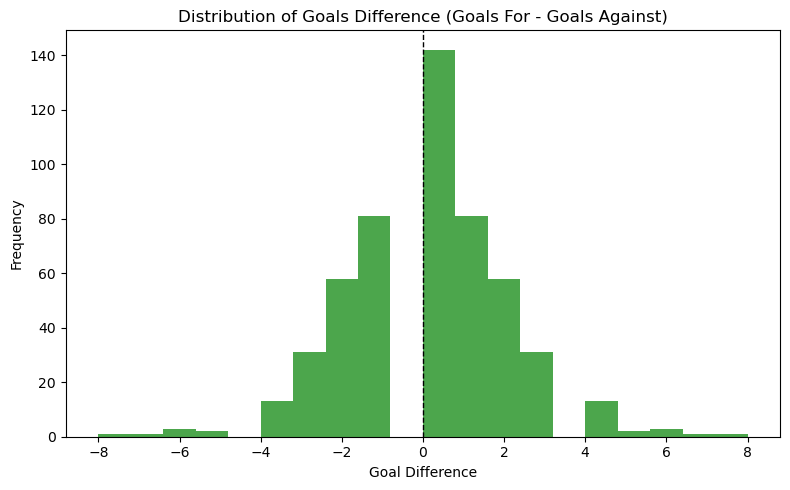

In [25]:
import matplotlib.pyplot as plt

# Plot distribution of goals_difference
plt.figure(figsize=(8, 5))  # Single plot, slightly wider

plt.hist(df["goals_difference"], bins=20, color="green", alpha=0.7)
plt.title("Distribution of Goals Difference (Goals For - Goals Against)")
plt.xlabel("Goal Difference")
plt.ylabel("Frequency")

# Add a vertical line at 0 to show neutral difference
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

### Data Cleaning and Wrangling

In [21]:
df = df.drop(['started', 'finished','is_win','is_loss','is_draw', 'cancelled', 'rating_diff', 'points_diff', 'round', 'team', 'opponent','goals_for', 'goals_against'], axis=1)

In [23]:
import pandas as pd

# Fill missing values with column mean
df = df.fillna(df.mean())

# Fill all numerical columns with their means
df.fillna(df.mean(numeric_only=True), inplace=True)

### Features/Target 

In [27]:
features = df.drop(columns=['goals_difference'])  # Features (X)
target = df[['goals_difference']]                # Targets (y - DataFrame)

###  Test/Train split

In [29]:

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Scaling the features 


In [33]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # fit and transform in one step.
X_test_scaled = scaler.transform(X_test)

In [35]:
# The step above returns a numpy array, if you want to convert it back to a DataFrame:
X_train_scal = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scal = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Linear Regression+Gridsearch

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Define Ridge regression and param grid
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# GridSearchCV
grid = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = grid.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Best Parameters:", grid.best_params_)
print(f"📉 Mean Squared Error: {mse:.4f}")
print(f"📈 R² Score: {r2:.4f}")


✅ Best Parameters: {'alpha': 10.0}
📉 Mean Squared Error: 1.2132
📈 R² Score: 0.7128


### Random Forest Regressor + Gridsearch

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



# Random Forest Regressor with Grid Search
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)  # Use unscaled data here for RF

# Predict
y_pred = grid_search.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Best Parameters Found:", grid_search.best_params_)
print(f"📉 Mean Squared Error: {mse:.4f}")
print(f"📈 R² Score: {r2:.4f}")


✅ Best Parameters Found: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
📉 Mean Squared Error: 1.3784
📈 R² Score: 0.6737


### KNN Regressor + Gridsearch

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Initialize KNN regressor
knn = KNeighborsRegressor()

# Grid search parameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Predict
y_pred = grid_search.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Best Parameters Found:", grid_search.best_params_)
print(f"📉 Mean Squared Error: {mse:.4f}")
print(f"📈 R² Score: {r2:.4f}")


✅ Best Parameters Found: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
📉 Mean Squared Error: 1.6520
📈 R² Score: 0.6089


### AdaBoost

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Define AdaBoost with a shallow Decision Tree
base_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
ada = AdaBoostRegressor(estimator=base_tree, random_state=42)  # <- Fixed here

# Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred = grid_search.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output
print("✅ Best Parameters Found:", grid_search.best_params_)
print(f"📉 Mean Squared Error: {mse:.4f}")
print(f"📈 R² Score: {r2:.4f}")


✅ Best Parameters Found: {'learning_rate': 0.01, 'n_estimators': 100}
📉 Mean Squared Error: 1.3407
📈 R² Score: 0.6826


### Decision Tree Regressor

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



# Decision Tree Regressor
dtree = DecisionTreeRegressor(random_state=42)

# Grid Search for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Prediction and evaluation
y_pred = grid_search.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output
print("✅ Best Parameters Found:", grid_search.best_params_)
print(f"📉 Mean Squared Error: {mse:.4f}")
print(f"📈 R² Score: {r2:.4f}")


✅ Best Parameters Found: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
📉 Mean Squared Error: 1.5003
📈 R² Score: 0.6449


In [47]:
pip install lightgbm catboost


Note: you may need to restart the kernel to use updated packages.


### All Models Together

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# ------------------- Step 1: Prepare Data -------------------
features = df.drop(columns=['goals_difference'])
target = df['goals_difference']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------- Step 2: Train Models -------------------

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# AdaBoost
ada = AdaBoostRegressor(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

# Decision Tree
dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
mse_dtree = mean_squared_error(y_test, y_pred_dtree)
r2_dtree = r2_score(y_test, y_pred_dtree)

# Gradient Boosting
gb = GradientBoostingRegressor(
    learning_rate=0.05, n_estimators=100, max_depth=3, subsample=1.0, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# LightGBM
lgb = LGBMRegressor(random_state=42)
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

# CatBoost
cat = CatBoostRegressor(verbose=0, random_state=42)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)

# ------------------- Step 3: Comparison Table -------------------
results = pd.DataFrame([
    ["Linear Regression", mse_lr, r2_lr],
    ["Random Forest", mse_rf, r2_rf],
    ["KNN", mse_knn, r2_knn],
    ["AdaBoost", mse_ada, r2_ada],
    ["Decision Tree", mse_dtree, r2_dtree],
    ["Gradient Boosting", mse_gb, r2_gb],
    ["LightGBM", mse_lgb, r2_lgb],
    ["CatBoost", mse_cat, r2_cat],
], columns=["Model", "MSE", "R2 Score"])

# Sort by R2 Score descending
results = results.sort_values(by="R2 Score", ascending=False).reset_index(drop=True)

# Show results
print("\n📊 Regression Model Comparison:")
print(results)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 417, number of used features: 28
[LightGBM] [Info] Start training from score -0.038369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [50]:
results

,Model,MSE,R2 Score
0,Linear Regression,1.253903,0.703176
1,Gradient Boosting,1.381955,0.672863
2,LightGBM,1.389017,0.671192
3,CatBoost,1.396473,0.669427
4,Random Forest,1.501049,0.644672
5,AdaBoost,1.579270,0.626155
6,KNN,1.955429,0.537111
7,Decision Tree,2.609524,0.382273


### R2 Score comparison

/var/folders/l4/g8j3y_vx0pq5tl_95dwxp9hr0000gp/T/ipykernel_930/654846610.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Model', data=results, palette='viridis')


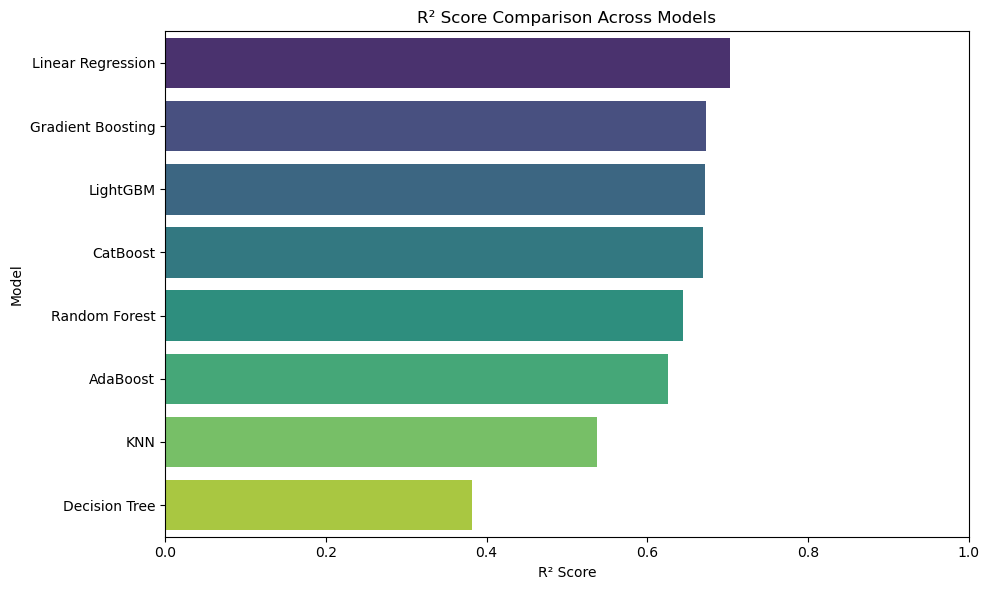

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart for R2 Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='R2 Score', y='Model', data=results, palette='viridis')
plt.title('R² Score Comparison Across Models')
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

### Linear Regression: Actual vs Predicted

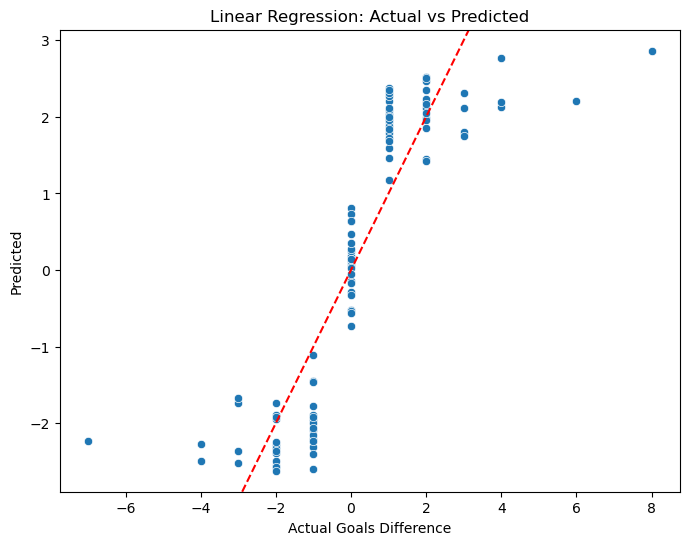

In [59]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_lr)  # change model here
plt.xlabel("Actual Goals Difference")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs Predicted")
plt.axline((0, 0), slope=1, color='red', linestyle='--')
plt.show()


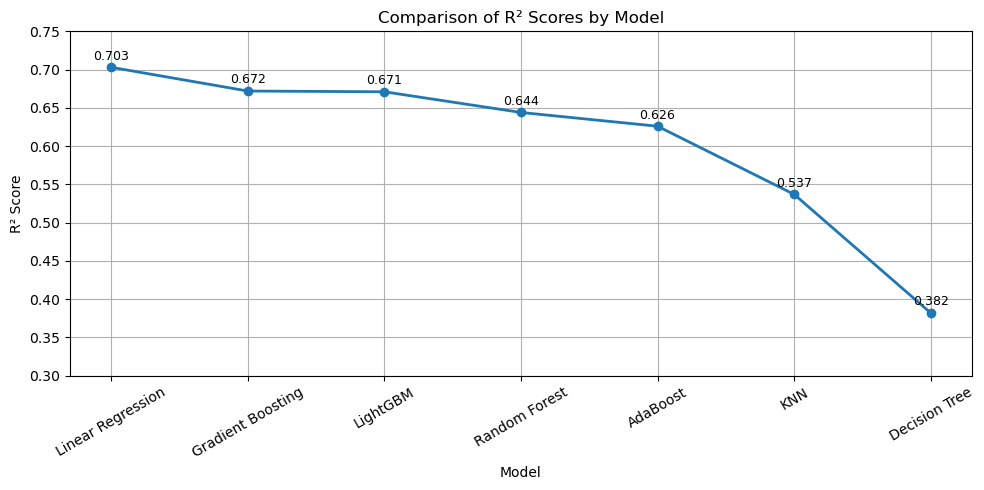

In [76]:
import matplotlib.pyplot as plt

# Model names and corresponding R2 scores
models = [
    "Linear Regression", "Gradient Boosting", "LightGBM", 
    "Random Forest", "AdaBoost", "KNN", "Decision Tree"
]
r2_scores = [0.703, 0.672, 0.671, 0.644, 0.626, 0.537, 0.382]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(models, r2_scores, marker='o', color='tab:blue', linewidth=2)

# Annotate points
for i, score in enumerate(r2_scores):
    plt.text(i, score + 0.01, f"{score:.3f}", ha='center', fontsize=9)

# Styling
plt.title("Comparison of R² Scores by Model")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.ylim(0.3, 0.75)
plt.grid(True)
plt.xticks(rotation=30)
plt.tight_layout()

plt.show()
